In [1]:
# uncomment next line if you want to make rotatable 3D plots (module ipympl must be installed)
# %matplotlib widget

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [3]:
def mandelbrot_step(z, c):
    return z**2 + c

def mandelbrot_iterate_broadcast(z_initial, c, iterations, cutoff = None):
    states = np.empty((iterations+1, *z_initial.shape), dtype=np.complex128)
    states[0] = z_initial
    for i in range(1, iterations+1):
        states[i] = mandelbrot_step(states[i-1], c)
        if cutoff is not None:
            states[i] = np.where(np.abs(states[i])<cutoff, states[i], np.NaN)
    return states

def mandelbrot_iterate_nobroadcast(z_initial, c, iterations, cutoff = None):
    z=z_initial
    for _ in range(iterations):
        z = mandelbrot_step(z, c)
        if cutoff is not None:
            z = np.where(np.abs(z)<cutoff, z, np.NaN)
    return z



In [4]:
def plot_mandelbrot_binary(c_grid, iterations, cutoff_plot, cutoff_calc = None, save_pdf=False, **kwargs):
    abs_vals = np.abs(mandelbrot_iterate_nobroadcast(0., c_grid, iterations, cutoff=cutoff_calc))
    mask_finite = abs_vals < cutoff_plot

    realpart = np.real(c_grid[mask_finite]).flatten()
    impart = np.imag(c_grid[mask_finite]).flatten()

    plt.figure(figsize=(14, 14))
    plt.scatter(realpart, impart, **kwargs)
    plt.xlabel('real part')
    plt.ylabel('imaginary part')
    plt.grid()
    if save_pdf:
        plt.savefig("plots/mandelbrot_binary.pdf", format="pdf")
    plt.show()

def plot_mandelbrot_colored(
        c_grid, iterations, vmin=None, vmax=None,
        cutoff_calc = None, save_pdf=False,
        color_outer=None,
        color_inner=None,
        **kwargs
        ):
    abs_vals = np.abs(mandelbrot_iterate_nobroadcast(0., c_grid, iterations, cutoff=cutoff_calc))
    
    
    realpart = np.real(c_grid).flatten()
    impart = np.imag(c_grid).flatten()

    # Use default colormap unless overridden in kwargs
    cmap = kwargs.pop('cmap', plt.cm.viridis).copy()
    # Customize colormap for NaNs and over-range values
    if color_outer is None:
        color_outer = "white"
    cmap.set_bad(color=color_outer) 
    if color_inner is None:
        color_inner = "black"
    cmap.set_bad(color=color_outer)
    cmap.set_over(color=color_outer)    
    cmap.set_under(color=color_inner)

    # Show the image
    plt.figure(figsize=(14, 14))
    img = plt.imshow(
        abs_vals,
        extent=[realpart.min(), realpart.max(), impart.min(), impart.max()],
        norm=LogNorm(vmin=vmin, vmax=vmax),
        cmap=cmap,
        **kwargs  # allows things like interpolation='none', aspect='auto', etc.
    )
    plt.colorbar(img, extend='both')

    plt.xlabel('real part')
    plt.ylabel('imaginary part')
    # plt.grid()
    if save_pdf:
        plt.savefig("plots/mandelbrot_color.pdf", format="pdf")
    plt.show()

def plot_mandelbrot_3D(c_grid, iterations, iterations_to_plot, cutoff_plot, cutoff_calc = None, save_png=False, **kwargs):
    state = c_grid
    state = mandelbrot_iterate_nobroadcast(0., state, iterations, cutoff=cutoff_calc)
    abs_vals = np.abs(mandelbrot_iterate_broadcast(state, c_grid, iterations_to_plot, cutoff=cutoff_calc))

    c_grid = np.array([c_grid for i in range(iterations_to_plot+1)])

    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.azim = -130
    ax.elev = 10
    sc = ax.scatter(np.real(c_grid), np.imag(c_grid).flatten(), abs_vals.flatten(), c=abs_vals.flatten(), cmap='viridis', vmin=0, vmax=cutoff_plot, **kwargs)
    ax.set_zlim([0,cutoff_plot])
    # plt.colorbar(sc)
    ax.grid(visible=False)
    ax._axis3don = False

    if save_png:
        plt.savefig("plots/mandelbrot_3D.png", format="png", dpi=500, bbox_inches = "tight")
    plt.show()


In [5]:
resolution = 300
# full extent
realpart, impart = np.linspace(-1.8, .5, resolution), np.linspace(-1.2, 1.2, resolution)
# zoom to second bubble
# realpart, impart = np.linspace(-1.5, -1.3, resolution), np.linspace(-.1, .1, resolution)
xs, ys = np.meshgrid(realpart, impart)
c_grid = xs + ys*1j

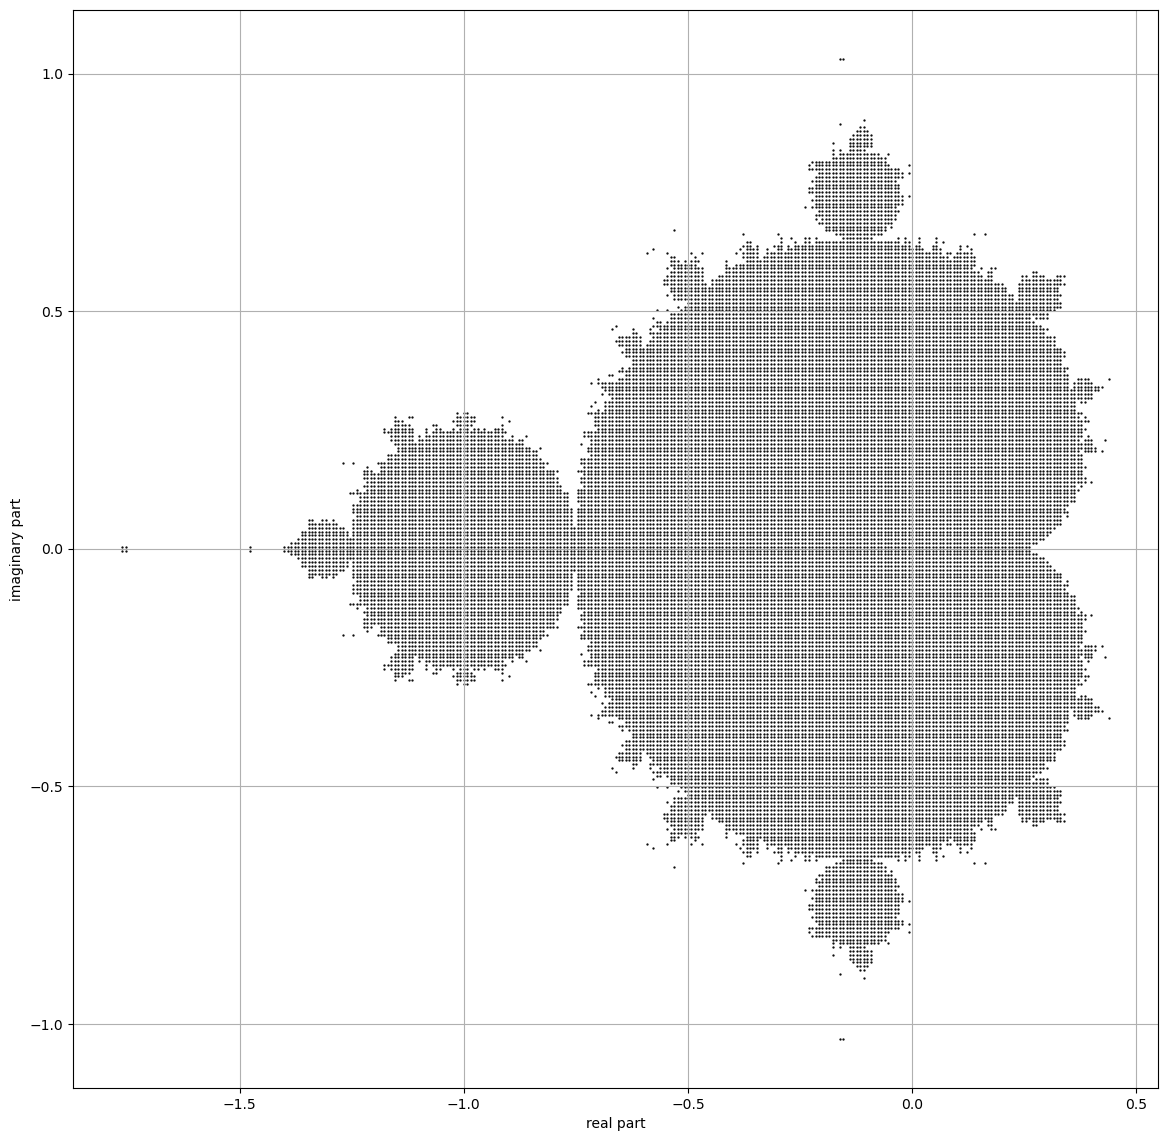

In [6]:
plot_mandelbrot_binary(c_grid, 80, 10e20, 10e20, s=.4, color='k', save_pdf=False);

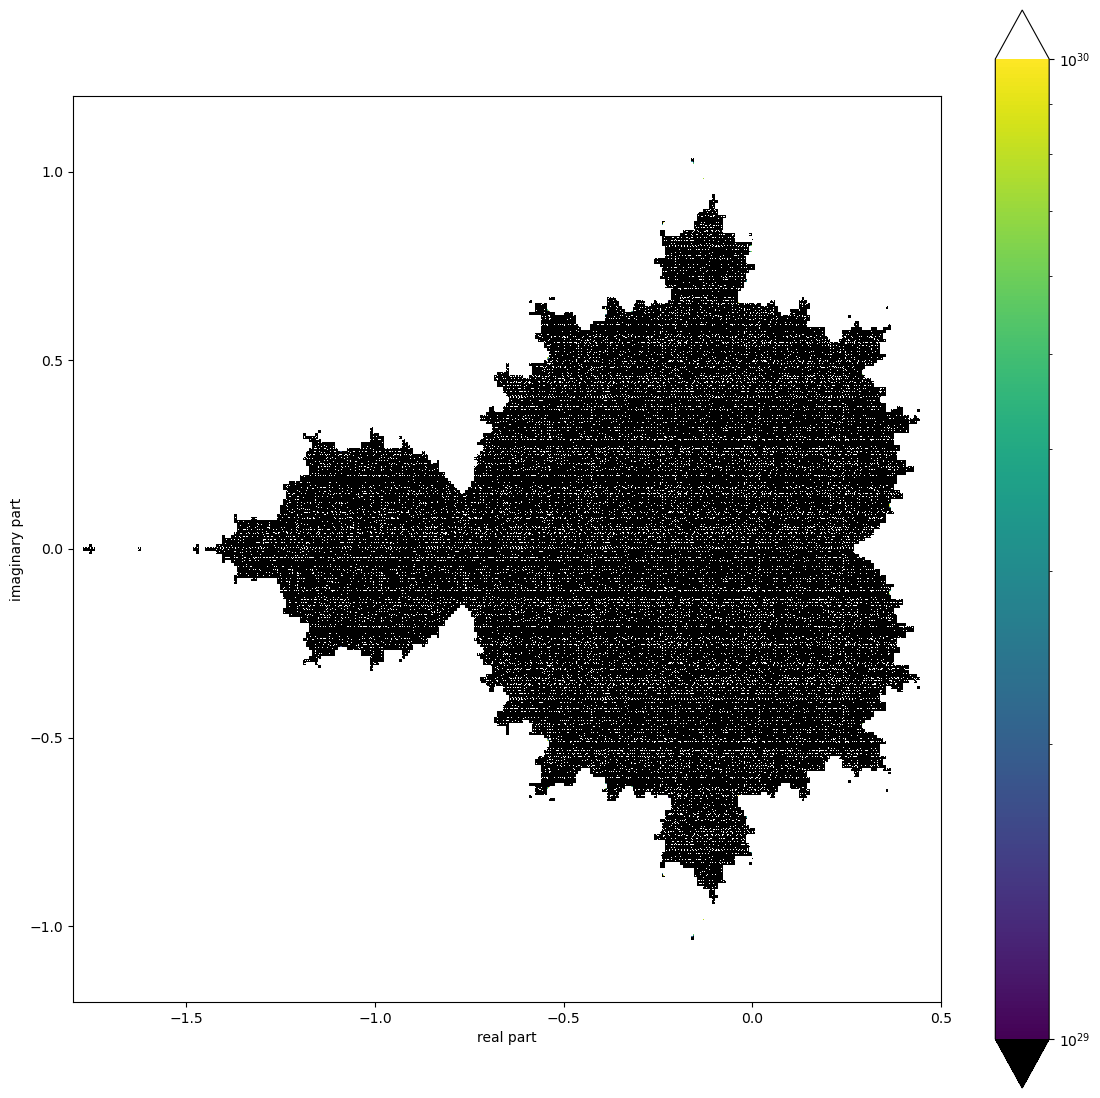

In [7]:
plot_mandelbrot_colored(c_grid, 25, cutoff_calc= 1e120, vmin = 1e29, vmax = 1e30, save_pdf=False);

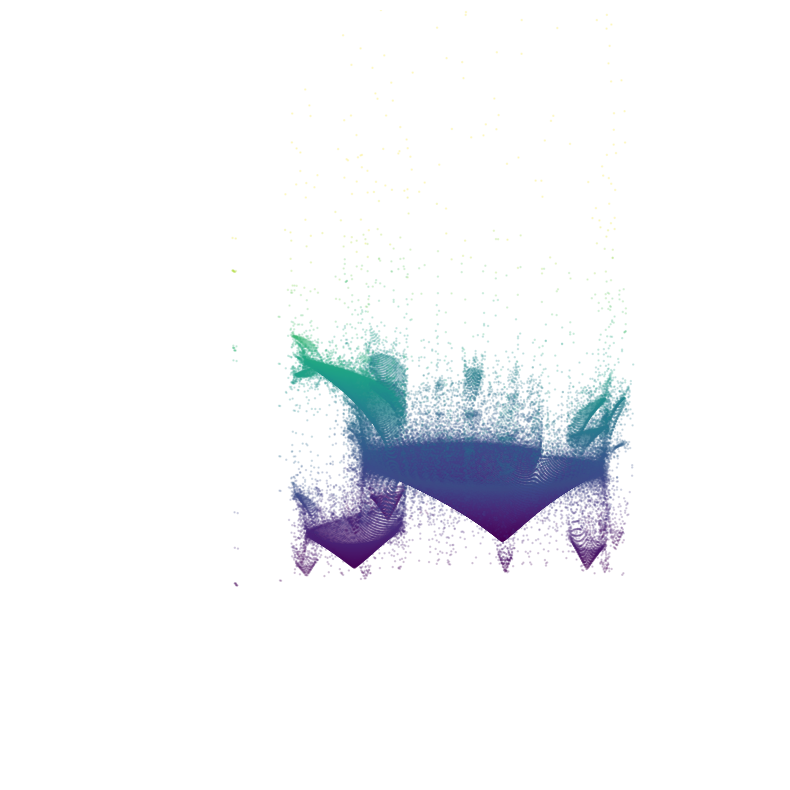

In [8]:
plot_mandelbrot_3D(c_grid, 50, 5, cutoff_calc=1e80, cutoff_plot=2, s=.5,alpha=.2, save_png=False);
